In [155]:
!pip install numpy matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


PRIMEIRA QUESTÃO
1) Modele os seguintes sólidos/objetos 
Na construção dos sólidos, crie uma função que retorne o sólido ( ou seja, retorne a matriz de vértices e arestas). Perceba que cada objeto é descrito indiretamente (no caso do cone, por exemplo, pelo raio e pela altura). A origem do objeto pode ser definida de forma fixa dentro da função ou, opcionalmente, pode ser passada também como parâmetro da função.

In [156]:
import sys
import numpy as np
sys.path.append('./modelos')  # adiciona a pasta modelos ao path

from utils import plotar_malha_3d

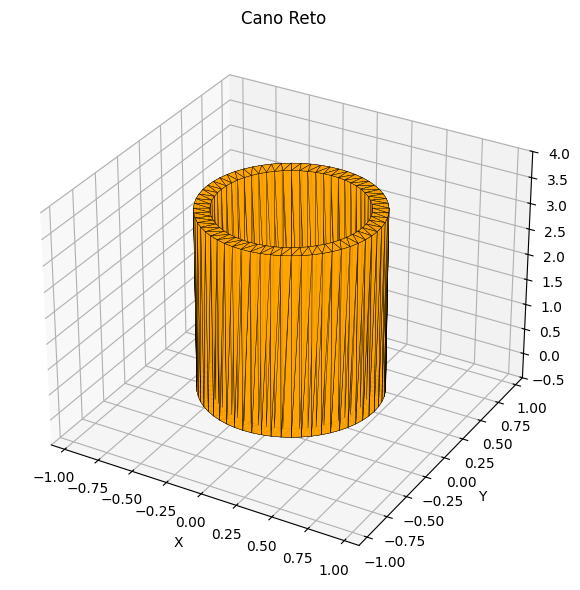

In [157]:
from objeto import Objeto3D

cano_reto = Objeto3D()
cano_reto.modelar_cano_reto(raio_interno=0.5, raio_externo=0.6, altura=3.5, resolucao=60)
plotar_malha_3d(cano_reto.vertices, cano_reto.faces, titulo="Cano Reto")

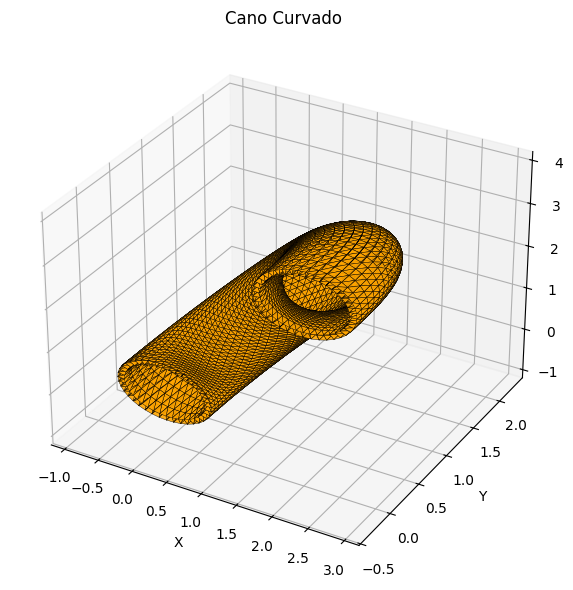

In [158]:
cano_curvado = Objeto3D()

cano_curvado.gerar_cano_curvado(
    P0 = np.array([0, 0, 0]),
    P1 = np.array([2, 0, 3]),
    T0 = np.array([0, 5, 0]), 
    T1 = np.array([0, -5, 0]),
    raio_externo=0.7,
    raio_interno=0.6,
    resolucao_circular=40,
    resolucao_curva=60)

plotar_malha_3d(cano_curvado.vertices, cano_curvado.faces,
                titulo="Cano Curvado")

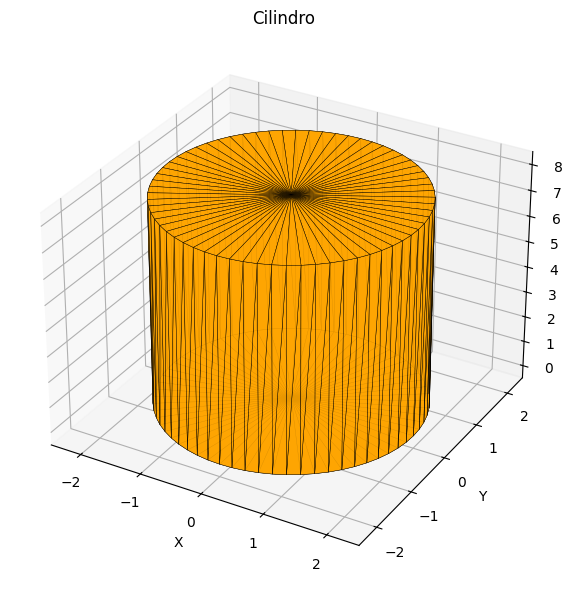

In [159]:
cilindro = Objeto3D()
cilindro.modelar_cilindro(raio=2.0, altura=8.0, resolucao=64)
plotar_malha_3d(cilindro.vertices, cilindro.faces, titulo="Cilindro")

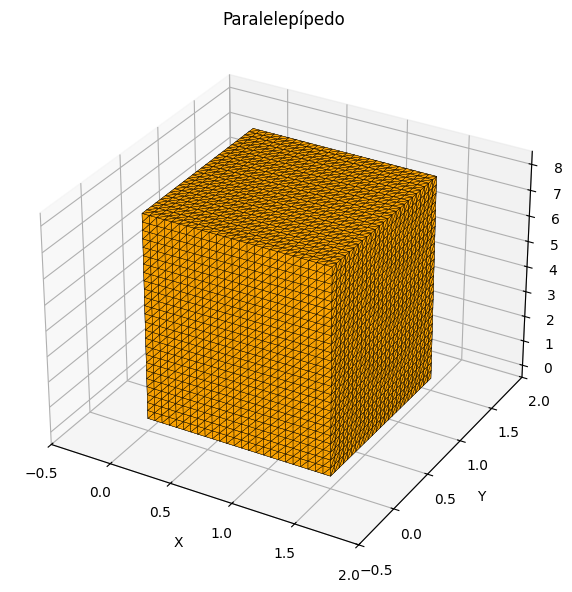

In [160]:
paralelepipedo = Objeto3D()
paralelepipedo.modelar_paralelepipedo(base=1.5, altura=8, comprimento=1.5, resolucao = 25)
plotar_malha_3d(paralelepipedo.vertices, paralelepipedo.faces, titulo="Paralelepípedo")

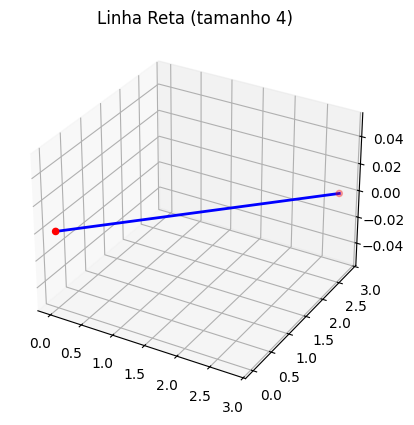

In [161]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

reta = Objeto3D()
reta.modelar_linha(tamanho=4, direcao=np.array([1, 1, 0]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = [v[0] for v in reta.vertices]
y_vals = [v[1] for v in reta.vertices]
z_vals = [v[2] for v in reta.vertices]

ax.plot(x_vals, y_vals, z_vals, color='blue', linewidth=2)
ax.scatter(x_vals, y_vals, z_vals, color='red')  # marca os pontos
ax.set_title("Linha Reta (tamanho 4)")
plt.show()

[INFO] Normalizando cena (uniforme) com fator 0.623
[INFO] Normalizando cena (uniforme) com fator 0.909


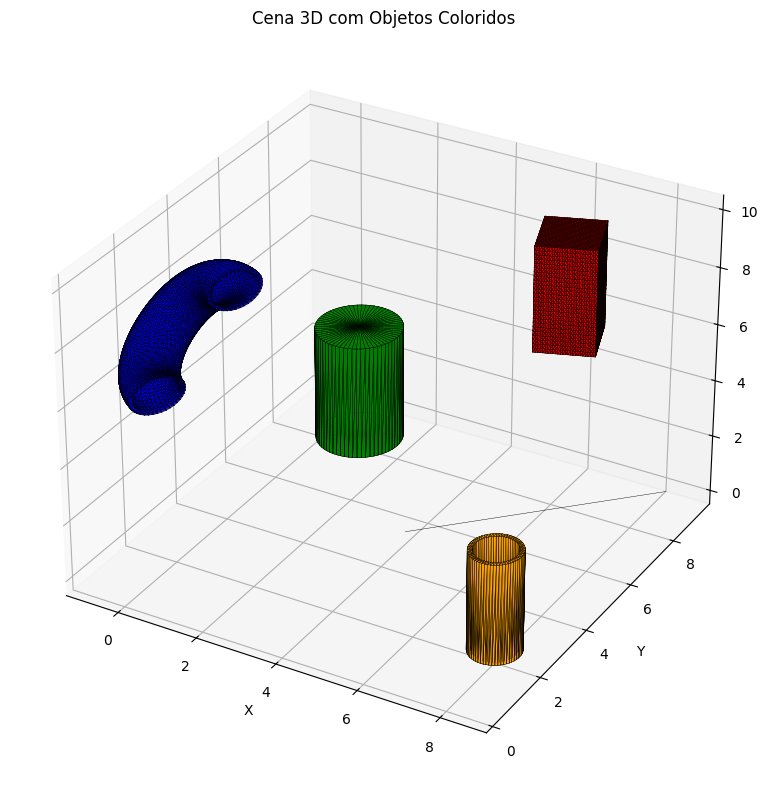

In [162]:
# 1. Modele e transforme individualmente
from utils import normalizar_cena, plotar_malhas_3d_multiplos

cano_reto.aplicar_translacao([0, 0, 0])
cano_reto.aplicar_rotacao('z', 90)
cano_reto.aplicar_translacao([8, 2, 0])

cano_curvado.aplicar_translacao([1, 0, 7])
cano_curvado.aplicar_escala(sx=1.5,sy=1.5, sz=1.5)
cano_curvado.aplicar_rotacao('z', 60)

cilindro.aplicar_escala(sx=0.5,sy=0.5, sz=0.5)
cilindro.aplicar_rotacao('z', 90)
cilindro.aplicar_translacao([1, 8, 0])

paralelepipedo.aplicar_escala(sx=1, sy=1, sz=0.5)
paralelepipedo.aplicar_rotacao('z', 20)
paralelepipedo.aplicar_translacao([7, 7, 7])


reta.aplicar_escala(sx=1.5,sy=1.5, sz=1.5)
reta.aplicar_translacao([4, 5, 0 ])

cano_reto.vertices = normalizar_cena(cano_reto.vertices)
cano_curvado.vertices = normalizar_cena(cano_curvado.vertices)
cilindro.vertices = normalizar_cena(cilindro.vertices)
paralelepipedo.vertices = normalizar_cena(paralelepipedo.vertices)
reta.vertices = normalizar_cena(reta.vertices)


# 2. Atribuir faces
cano_reto.atribuir_faces()
cano_curvado.atribuir_faces()
cilindro.atribuir_faces()
paralelepipedo.atribuir_faces()
reta.atribuir_faces()

# 3. Unir todos os vértices e faces
vertices_total = (
    cano_reto.vertices +
    cano_curvado.vertices +
    cilindro.vertices +
    paralelepipedo.vertices +
    reta.vertices
)

faces_total = (
    cano_reto.faces +
    cano_curvado.faces +
    cilindro.faces +
    paralelepipedo.faces +
    reta.faces
)

objetos = [
    (cano_reto.vertices, cano_reto.faces, "orange", "Cano Reto"),
    (cano_curvado.vertices, cano_curvado.faces, "blue", "Cano Curvado"),
    (cilindro.vertices, cilindro.faces, "green", "Cilindro"),
    (paralelepipedo.vertices, paralelepipedo.faces, "red", "Paralelepípedo"),
    (reta.vertices, reta.faces, "brown", "Reta")
]

plotar_malhas_3d_multiplos(objetos, titulo="Cena 3D com Objetos Coloridos")


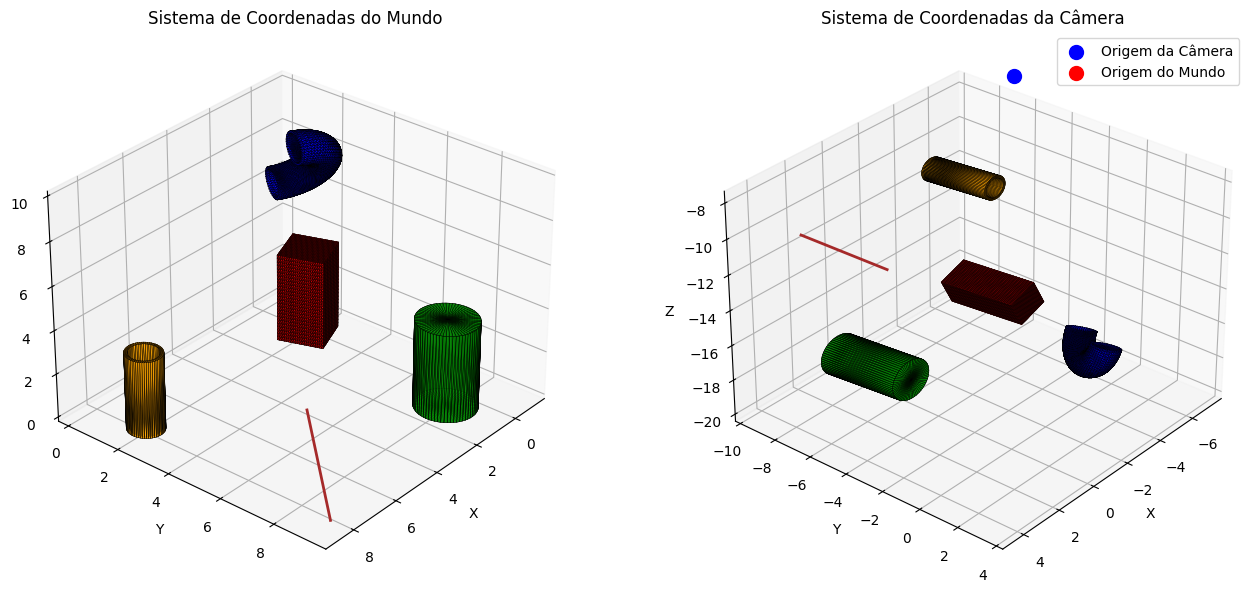

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Agrupando vértices para obter o centro
objetos_3d = [cano_reto, cano_curvado, cilindro, paralelepipedo]
vertices_geral = np.vstack([np.array(obj.vertices) for obj in objetos_3d])

# Posição da câmera
centro = np.mean(vertices_geral, axis=0)
camera_pos = centro + np.array([12.1, 0.0, 1.1])
camera_target = centro
up = np.array([0, 0, 1])

z_cam = camera_pos - camera_target
z_cam = z_cam / np.linalg.norm(z_cam)
if abs(np.dot(z_cam, up)) > 0.98:
    up = np.array([0, 1, 0])

x_cam = np.cross(up, z_cam)
x_cam = x_cam / np.linalg.norm(x_cam)
y_cam = np.cross(z_cam, x_cam)
R = np.array([x_cam, y_cam, z_cam])

def para_camera(vertices):
    deslocados = np.array(vertices) - camera_pos
    return (R @ deslocados.T).T

def organizar_objeto(nome, objeto, cor, alpha):
    return {
        "nome": nome,
        "vertices": np.array(objeto.vertices),
        "faces": objeto.faces,
        "cor": cor,
        "alpha": alpha
    }

objetos = [
    organizar_objeto("Cano Reto", cano_reto, "orange", 0.8),
    organizar_objeto("Cano Curvado", cano_curvado, "blue", 0.8),
    organizar_objeto("Cilindro", cilindro, "green", 0.8),
    organizar_objeto("Paralelepípedo", paralelepipedo, "red", 0.8),
    {
        "nome": "Linha Reta",
        "vertices": np.array(reta.vertices),
        "faces": None,
        "cor": "brown",
        "alpha": 1.0
    }
]

# Plotagem lado a lado
fig = plt.figure(figsize=(14, 6))

# --- Subplot 1: Sistema do Mundo ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
for obj in objetos:
    verts = obj["vertices"]
    faces = obj["faces"]
    cor = obj["cor"]
    alpha = obj["alpha"]

    if faces:
        polys = [[verts[i] for i in face] for face in faces]
        ax1.add_collection3d(Poly3DCollection(polys, facecolor=cor, edgecolor='k', alpha=alpha, linewidths=0.3))
    else:
        ax1.plot(verts[:, 0], verts[:, 1], verts[:, 2], color=cor, linewidth=2)

ax1.set_title("Sistema de Coordenadas do Mundo")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.view_init(elev=30, azim=40)

# --- Subplot 2: Sistema da Câmera ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for obj in objetos:
    verts = para_camera(obj["vertices"])
    faces = obj["faces"]
    cor = obj["cor"]
    alpha = obj["alpha"]

    if faces:
        polys = [[verts[i] for i in face] for face in faces]
        ax2.add_collection3d(Poly3DCollection(polys, facecolor=cor, edgecolor='k', alpha=alpha, linewidths=0.3))
    else:
        ax2.plot(verts[:, 0], verts[:, 1], verts[:, 2], color=cor, linewidth=2)

# Pontos de referência
ax2.scatter(0, 0, 0, color='blue', s=100, label='Origem da Câmera')
origem_mundo_em_camera = para_camera([[0, 0, 0]])[0]
ax2.scatter(*origem_mundo_em_camera, color='red', s=100, label='Origem do Mundo')

# Ajustar limites
pts_cam = np.vstack([para_camera(obj["vertices"]) for obj in objetos])
pad = 2.0
ax2.set_xlim(pts_cam[:, 0].min() - pad, pts_cam[:, 0].max() + pad)
ax2.set_ylim(pts_cam[:, 1].min() - pad, pts_cam[:, 1].max() + pad)
ax2.set_zlim(pts_cam[:, 2].min() - pad, pts_cam[:, 2].max() + pad)

ax2.set_title("Sistema de Coordenadas da Câmera")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.view_init(elev=30, azim=40)
ax2.legend()

plt.tight_layout()
plt.show()


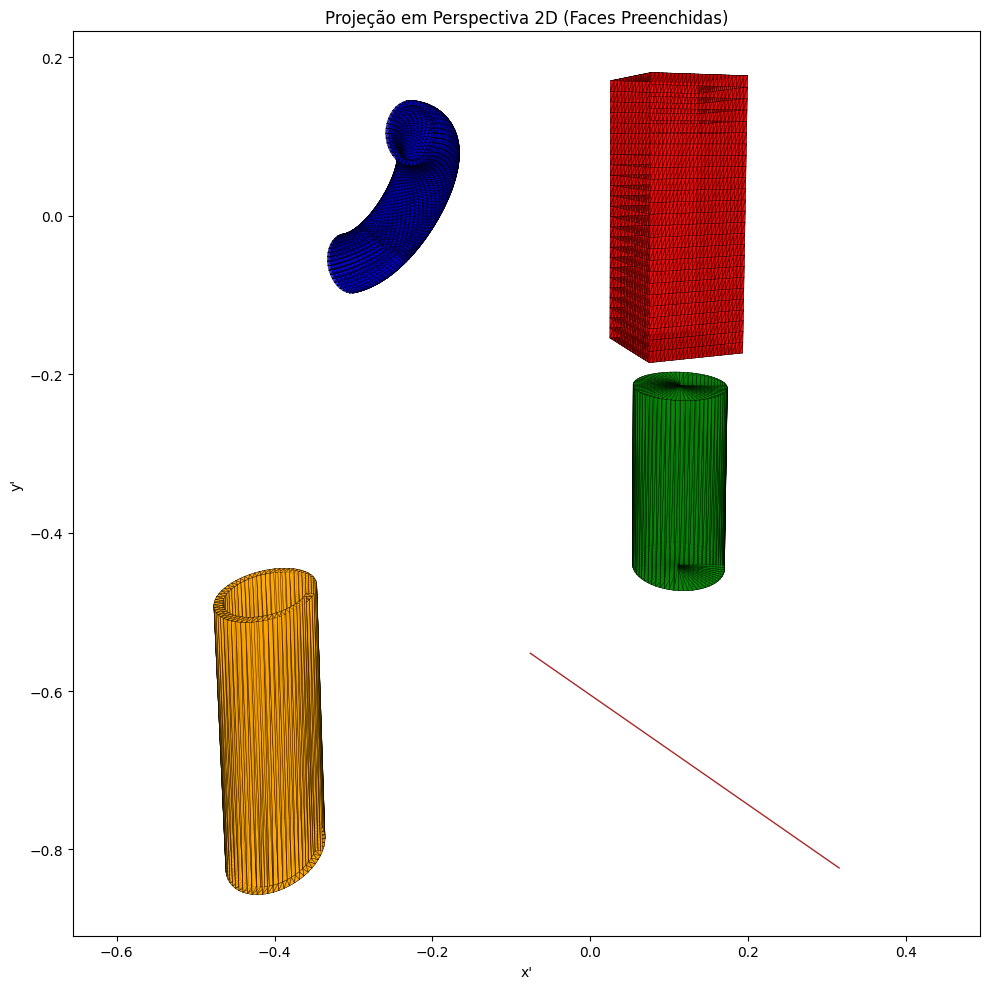

In [164]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Distância focal da projeção
d = 1.0

# Projeção em perspectiva
def perspectiva(pts):
    pts = np.array(pts)
    z = pts[:, 2]
    z[z == 0] = 1e-6  # evitar divisão por zero
    x_proj = -pts[:, 0] / z * d
    y_proj = -pts[:, 1] / z * d
    return np.stack([x_proj, y_proj], axis=1)

# Transformar e projetar objetos
objetos_proj = []
for obj in objetos:
    verts_3d = para_camera(obj["vertices"])
    verts_2d = perspectiva(verts_3d)
    objetos_proj.append({
        "nome": obj["nome"],
        "vertices": verts_2d,
        "faces": obj["faces"],
        "cor": obj["cor"]
    })

# Plotando faces preenchidas
plt.figure(figsize=(10, 10))
ax = plt.gca()

for obj in objetos_proj:
    verts = obj["vertices"]
    faces = obj["faces"]
    cor = obj["cor"]

    if faces:
        patches = []
        for face in faces:
            pts = verts[face]
            polygon = Polygon(pts, closed=True)
            patches.append(polygon)
        collection = PatchCollection(patches, facecolor=cor, edgecolor='black', linewidths=0.3, alpha=0.8)
        ax.add_collection(collection)
    else:
        ax.plot(verts[:, 0], verts[:, 1], color=cor, linewidth=1.0)

ax.set_title("Projeção em Perspectiva 2D (Faces Preenchidas)")
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.axis("equal")
ax.axis("on")
plt.tight_layout()
plt.show()


In [165]:
from PIL import Image, ImageDraw

# Mapeia coordenadas 2D para a imagem usando bounding box dinâmico
def normalizar_com_bbox(verts, res, bbox_min, bbox_max, margem=0.05):
    verts = np.array(verts)
    size = bbox_max - bbox_min
    bbox_min = bbox_min - margem * size
    bbox_max = bbox_max + margem * size
    size = bbox_max - bbox_min

    verts_norm = (verts - bbox_min) / size
    x = (verts_norm[:, 0] * (res - 1)).astype(int)
    y = ((1 - verts_norm[:, 1]) * (res - 1)).astype(int)
    return np.stack([x, y], axis=1)

def rasterizar_com_melhorias(objetos_proj, resolucoes, nome_base='melhor_raster'):
    # Calcular bounding box global
    todos_verts = np.vstack([obj["vertices"] for obj in objetos_proj])
    bbox_min = np.min(todos_verts, axis=0)
    bbox_max = np.max(todos_verts, axis=0)

    # Paleta RGB forte
    cores_rgb = {
        'orange': (255, 165, 0),
        'blue': (30, 144, 255),
        'green': (0, 200, 0),
        'red': (250, 0, 0),
        'brown': (139, 69, 19)
    }

    for res in resolucoes:
        img = Image.new("RGB", (res, res), (255, 255, 255))
        draw = ImageDraw.Draw(img)

        for obj in objetos_proj:
            cor = cores_rgb.get(obj["cor"], (0, 0, 0))
            verts_2d = normalizar_com_bbox(obj["vertices"], res, bbox_min, bbox_max)
            faces = obj["faces"]

            if faces:
                for face in faces:
                    pts = [tuple(verts_2d[i]) for i in face]
                    draw.polygon(pts, fill=cor, outline=(0, 0, 0))
            else:
                for i in range(len(verts_2d) - 1):
                    draw.line([tuple(verts_2d[i]), tuple(verts_2d[i+1])], fill=cor, width=2)

        path = f"{nome_base}_{res}x{res}.png"
        img.save(path)
        print(f"Imagem salva: {path}")


In [166]:
resolucoes = [200, 500, 1080]
rasterizar_com_melhorias(objetos_proj, resolucoes)


Imagem salva: melhor_raster_200x200.png
Imagem salva: melhor_raster_500x500.png
Imagem salva: melhor_raster_1080x1080.png
